In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('talk')

# Example: Major Midwinter Warming

Historically, major midwinter warmings of the Northern Hemisphere stratosphere occur every other year (i.e. the probability of getting one in any year is p=0.5).

During the decade of the 1990’s, seven years without major warmings occurred. Was that decade any special?

A simulation will help to answer this question:

We assume that getting a major warming in a year is decided by tossing a coin (more formally, we will use the Bernoulli distribution with equal probability for each outcome). This assumption includes that each the occurrence of warmings in year is independent of previous years. A set of assumptions about data is called a model. So the above assumptions form a model for the occurrence of major midwinter warmings.

We simulate the statistic under the assumption that our model is valid.

Then we compare our observation to the resulting distribution of our statistic.

In [17]:
distr = sns.distributions.stats.bernoulli(p=0.5)

In [11]:
def simulate(size):
    n_warmings = distr.rvs(size=size).sum(axis=-1) - 5 #rvs method random variates from our distribution
    return n_warmings
# -5 to put our mean in the middle, summing the N_years 

In [12]:
N_rep = 1000000
N_years = 10

outcome = simulate((N_rep, N_years)) # it is a matrix

In [13]:
# compute cdf
val, counts = np.unique(outcome, return_counts=True) #conta unique values em ordem e o n de vezes que aparecem

counts = counts / counts.sum() # probability
cdf = counts.cumsum() # cdf

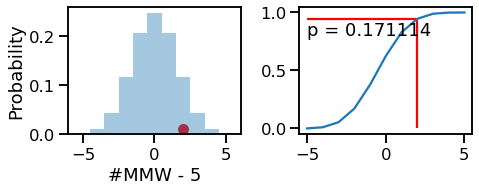

In [18]:
plt.figure(figsize=(7., 3.))

plt.subplot(1, 2, 1)

sns.distplot(
    outcome, kde=False, norm_hist=True,
    bins=np.arange(-5.5, 6.5, 1),
    label="Model"
);
plt.scatter(2, 0.01, marker='o', color='red', s=90);
plt.ylabel('Probability')
plt.xlabel('#MMW - 5')

plt.subplot(1, 2, 2)
plt.plot(val, cdf);
plt.vlines(2, 0, cdf[7], colors='red');
plt.hlines(cdf[7], -5, 2, colors='red');

pval = np.count_nonzero(outcome >= 2) / N_rep

plt.annotate(
    'p = {:5.6f}'.format(pval),
    xy=(-5, .8), xytext=(-5, .8)
);

plt.tight_layout()
# plt.savefig('../img/3_MMW.svg', bbox_inches='tight', pad_inches=.1)

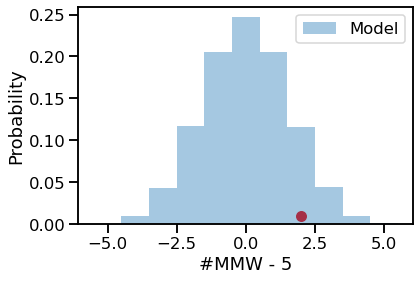

In [22]:
sns.distplot(
    outcome, kde=False, norm_hist=True,
    bins=np.arange(-5.5, 6.5, 1),
    label="Model"
);
plt.scatter(2, 0.01, marker='o', color='red', s=90);
plt.ylabel('Probability')
plt.xlabel('#MMW - 5');
plt.legend()

# plt.savefig('../img/3_MMW_2.svg', bbox_inches='tight', pad_inches=.1)

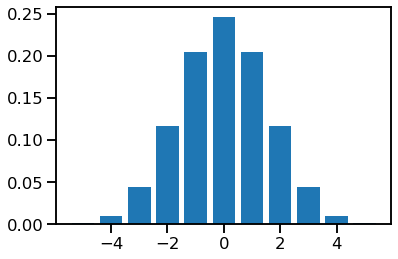

In [33]:
binom = sns.distributions.stats.binom(n=10, p=0.5, loc=-5)

k = np.arange(-5, 6)
plt.bar(k, binom.pmf(k));

In [34]:
1 - binom.cdf(1)

0.171875